In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('H2HBABBA3183.csv',nrows=50000)
df.shape

(50000, 19)

In [3]:
pd.set_option ('display.max_columns',300)

In [4]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR llc,2019-12-10 00:00:00,2019.0,1.930187e+09,2019-11-24,20191123,20191124,20191209.0,USD,RV,1.0,NaN,23039.94,20191124.0,NAH4,1.930187e+09,0
1,U001,0200519201,KROGE in,2019-06-10 00:00:00,2019.0,1.929369e+09,2019-05-25,20190523,20190525,20190609.0,USD,RV,1.0,NaN,17126.20,20190525.0,NAA8,1.929369e+09,0
2,U001,0200744019,TARG in,2019-11-21 00:00:00,2019.0,1.930097e+09,2019-11-05,20191104,20191105,20191120.0,USD,RV,1.0,NaN,2570.12,20191105.0,NAA8,1.930097e+09,0
3,U001,0200793568,SUPE trust,2019-02-20 00:00:00,2019.0,1.928730e+09,2019-02-05,20190204,20190205,20190220.0,USD,RV,1.0,NaN,59024.98,20190205.0,NAA8,1.928730e+09,0
4,U001,200769623,WAL-MAR corp,2019-04-09 00:00:00,2019.0,1.929045e+09,2019-03-28,20190328,20190328,20190412.0,USD,RV,1.0,NaN,471.56,20190328.0,NAH4,1.929045e+09,0


# Sorting the dataset based on posting_date

In [5]:
df=df.sort_values("posting_date") #sorting the entire dataframe based on ascending order of posting_date

In [6]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
11567,U001,0200726979,BJ'S systems,2019-01-15 00:00:00,2019.0,1.928534e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,1.0,NaN,173.86,20181230.0,NAA8,1.928534e+09,0
12702,U001,0200726979,BJ'S us,2019-01-15 00:00:00,2019.0,1.928542e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,1.0,NaN,207.74,20181230.0,NAA8,1.928542e+09,0
1462,U001,0200769623,WAL-MAR,2019-01-15 00:00:00,2019.0,1.928531e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,1.0,NaN,73065.70,20181230.0,NAH4,1.928531e+09,0
1500,U001,0200769623,WAL-MAR corporation,2019-01-15 00:00:00,2019.0,1.928541e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,1.0,NaN,5008.13,20181230.0,NAH4,1.928541e+09,0
17507,U001,0200743123,KROGER foundation,2019-01-14 00:00:00,2019.0,1.928540e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,1.0,NaN,50228.95,20181230.0,NAA8,1.928540e+09,0


# Check columns with null values

# Null-Imputation

In [7]:
df.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    3
isOpen                        0
dtype: int64

The null values of invoice_id can be filled with mode

In [8]:
df['invoice_id'].fillna(df['invoice_id'].mode().median(),inplace=True) 
#by .mode().median() the median value of all the modal values will be used

The null values of clear_date are to be predicted, so they can be kept for now

In [9]:
df.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64

Now all null values are removed

# Changing the formats of dates

In [10]:
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'], format='%Y%m%d')
df['document_create_date'] = pd.to_datetime(df['document_create_date'], format='%Y%m%d')
df['due_in_date'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d')
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'], format='%Y%m%d')
df['buisness_year'] =pd.to_datetime(df['buisness_year'],format='%Y')
df['clear_date'] = pd.to_datetime(df['clear_date'])
df['posting_date'] = pd.to_datetime(df['posting_date'])

In [11]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
11567,U001,0200726979,BJ'S systems,2019-01-15,2019-01-01,1.928534e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,173.86,2018-12-30,NAA8,1.928534e+09,0
12702,U001,0200726979,BJ'S us,2019-01-15,2019-01-01,1.928542e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,207.74,2018-12-30,NAA8,1.928542e+09,0
1462,U001,0200769623,WAL-MAR,2019-01-15,2019-01-01,1.928531e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,73065.70,2018-12-30,NAH4,1.928531e+09,0
1500,U001,0200769623,WAL-MAR corporation,2019-01-15,2019-01-01,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,5008.13,2018-12-30,NAH4,1.928541e+09,0
17507,U001,0200743123,KROGER foundation,2019-01-14,2019-01-01,1.928540e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,50228.95,2018-12-30,NAA8,1.928540e+09,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 11567 to 1509
Data columns (total 19 columns):
business_code             50000 non-null object
cust_number               50000 non-null object
name_customer             50000 non-null object
clear_date                40000 non-null datetime64[ns]
buisness_year             50000 non-null datetime64[ns]
doc_id                    50000 non-null float64
posting_date              50000 non-null datetime64[ns]
document_create_date      50000 non-null datetime64[ns]
document_create_date.1    50000 non-null datetime64[ns]
due_in_date               50000 non-null datetime64[ns]
invoice_currency          50000 non-null object
document type             50000 non-null object
posting_id                50000 non-null float64
area_business             0 non-null float64
total_open_amount         50000 non-null float64
baseline_create_date      50000 non-null datetime64[ns]
cust_payment_terms        50000 non-null object
invoice_id      

# Changing the currency type

In [13]:
currency_uniqueValues = df['invoice_currency'].unique()
currency_uniqueValues

array(['USD', 'CAD'], dtype=object)

Therefore, there are 2 types of currencies in the dataframe: USD & CAD

In [14]:
#1CAD=0.81USD
#function to convert CAD to USD

for i in df['invoice_currency']:
    if (i=='CAD'):
        df['total_open_amount']=df['total_open_amount']*0.81
        df['invoice_currency']='USD'

In [15]:
currency_uniqueValues_new = df['invoice_currency'].unique()
currency_uniqueValues_new

array(['USD'], dtype=object)

Now we have only one type of currency: USD

Now, since we have constant value for the column 'invoice_currency', we can drop it.

In [16]:
print('Shape before dropping: ',df.shape)
df.drop('invoice_currency',axis=1,inplace=True)
print('Shape after dropping: ',df.shape)

Shape before dropping:  (50000, 19)
Shape after dropping:  (50000, 18)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 11567 to 1509
Data columns (total 18 columns):
business_code             50000 non-null object
cust_number               50000 non-null object
name_customer             50000 non-null object
clear_date                40000 non-null datetime64[ns]
buisness_year             50000 non-null datetime64[ns]
doc_id                    50000 non-null float64
posting_date              50000 non-null datetime64[ns]
document_create_date      50000 non-null datetime64[ns]
document_create_date.1    50000 non-null datetime64[ns]
due_in_date               50000 non-null datetime64[ns]
document type             50000 non-null object
posting_id                50000 non-null float64
area_business             0 non-null float64
total_open_amount         50000 non-null float64
baseline_create_date      50000 non-null datetime64[ns]
cust_payment_terms        50000 non-null object
invoice_id                50000 non-null float64
isOpen         

In [18]:
df.nunique()

business_code                 6
cust_number                1398
name_customer              4126
clear_date                  389
buisness_year                 2
doc_id                    48798
posting_date                502
document_create_date        508
document_create_date.1      502
due_in_date                 542
document type                 2
posting_id                    1
area_business                 0
total_open_amount         44286
baseline_create_date        503
cust_payment_terms           75
invoice_id                48796
isOpen                        2
dtype: int64

From here we can find out that:
    posting_id is constant,
    
    business_code, business_year and document type are categorical,
    
    isOpen will be used to split the data so we can ignore it for now

In [19]:
df.var(axis=None, skipna=None, level=None, numeric_only=None)#variance

doc_id               8.005909e+16
posting_id           0.000000e+00
area_business                 NaN
total_open_amount    1.023811e+09
invoice_id           7.669501e+16
isOpen               1.600032e-01
dtype: float64

In [20]:
df.std()#standard deviation

doc_id               2.829471e+08
posting_id           0.000000e+00
area_business                 NaN
total_open_amount    3.199704e+04
invoice_id           2.769386e+08
isOpen               4.000040e-01
dtype: float64

Also, posting_id has variance and standard deviation as 0

So, It is constant

In [21]:
print('Shape before dropping: ',df.shape)
df.drop('posting_id',axis=1,inplace=True)
print('Shape after dropping: ',df.shape)

Shape before dropping:  (50000, 18)
Shape after dropping:  (50000, 17)




Finding correlation between invoice_id and doc_id

In [22]:
col1 = df['invoice_id']
col2 = df['doc_id']
correl=col1.corr(col2)
print(correl)

0.9782959565902092


This is almost 1 so we can use only 1

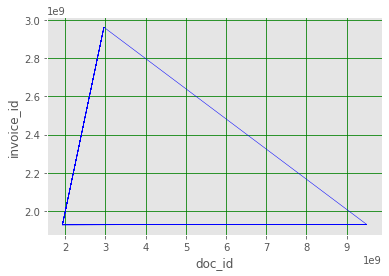

In [23]:
from matplotlib import style
style.use('ggplot')
x=df['doc_id']
y=df['invoice_id']
plt.plot(x, y, linewidth=0.5, color='b')
plt.xlabel('doc_id')
plt.ylabel('invoice_id')
plt.grid(True,color='g')
plt.show()

The line graph between invoice_id and doc_id has gradient almost 1. 

In [ ]:
#finding count of null values in invoice_id
print(df['invoice_id'].isnull().sum())
print(df['doc_id'].isnull().sum())

Alhough, now the null count is coming as 0, initially, we did some modal processing on invoice_id. So, we can drop invoide_id for more accuracy and authenticity. 

In [ ]:
#since invoice_id has null values so we can drop invoice_id
print('Shape before dropping: ',df.shape)
df.drop('invoice_id',axis=1,inplace=True)
print('Shape after dropping: ',df.shape)

To check if isopen and clear_date are inter-related

In [ ]:
c=0
for i in df['isOpen']:
    if (i==1):
        c+=1
if(c==df['clear_date'].isnull().sum()):
    print('Both are inter-related')
else:
    print('Both are not inter-raleted')

Now we can drop isOpen()

In [ ]:
#So here we can drop isOpen
print('Shape before dropping: ',df.shape)
df.drop('isOpen',axis=1,inplace=True)
print('Shape after dropping: ',df.shape)

In [ ]:
df.nunique()

Since area_business is always null we can drop it

In [ ]:
print('Shape before dropping: ',df.shape)
df=df.drop('area_business',axis=1)#dropping 'area_business'
print('Shape after dropping: ',df.shape)

# Splitting the dataset based on Null clear_date

In [ ]:
df['clear_date'].isnull().sum()

In [ ]:
#initial split between dataset based on availability of clear_date
X_predict=df[df['clear_date'].isnull()==True].copy() #clear_date not available
X_train_main=df[df['clear_date'].isnull()==False].copy()#clear_date available

In [ ]:
(X_predict.shape,X_train_main.shape)

# Now we'll check duplicate/constants on X_train_main

In [ ]:
X_train_main.nunique()

In [ ]:
X_train_main.info()

# name_customer has more unique values compared to cust_number.
So we can keep name_customer and drop cust_number

In [ ]:
print('Shape before dropping: ',X_train_main.shape)
X_train_main.drop('cust_number',axis=1,inplace=True)
print('Shape after dropping: ',X_train_main.shape)

In [ ]:
X_train_main.name_customer.value_counts().head(20)

From here we can conclude that we can keep top 11 and rest all as others

In [ ]:
X_train_main['name_customer'] = np.where(~ X_train_main['name_customer'].isin(['WAL-MAR corp',
                                        'WAL-MAR llc',
                                        'WAL-MAR corporation',
                                        'WAL-MAR foundation',
                                        'WAL-MAR associates',
                                        'WAL-MAR trust',
                                        'WAL-MAR us',
                                        'WAL-MAR co',
                                        'WAL-MAR',
                                        'WAL-MAR systems',
                                        'WAL-MAR in']),'Other',X_train_main['name_customer'])

In [ ]:
X_train_main.name_customer.value_counts().head(20)

## Check for cust_payment_terms

In [ ]:
X_train_main.cust_payment_terms.value_counts().head(10)

From here we can keep top 5 and group rest as other_terms

In [ ]:
X_train_main['cust_payment_terms'] = np.where(~ X_train_main['cust_payment_terms'].isin(['NAA8',
                                        'NAH4',
                                        'CA10',
                                        'NAC6',
                                        'NAM4']),'other_terms',X_train_main['cust_payment_terms'])

In [ ]:
X_train_main.cust_payment_terms.value_counts().head(20)

# Now I will calculate delay for the X_train_main set

Delay will act as the target value in the model

Delay = clear_date - due_date

In [ ]:
X_train_main['delay']=X_train_main['clear_date'] - X_train_main['due_in_date']

In [ ]:
X_train_main['delay'].dtypes

In [ ]:
X_train_main['delay']=X_train_main['delay'].dt.days
X_train_main['delay'].dtypes

In [ ]:
X_train_main.info()

## Label-encoding for document type

this is performed before spliting because after splitting some labels are missed from some dataframes

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
doc_type_encode = LabelEncoder()
doc_type_encode.fit(X_train_main['document type'])
X_train_main['document_type_encoded'] = doc_type_encode.transform(X_train_main['document type'])

In [ ]:
X_train_main.drop('document type',inplace=True,axis=1)

## Now, we can remove clear_date & due_in_date from both X_predict and X_train_main because this is the final value we need to predict

In [ ]:
X_predict.drop('clear_date',inplace=True, axis=1)
X_train_main.drop('clear_date',inplace=True, axis=1)

# Split into train-test-validate

In [ ]:
X=X_train_main.drop(['delay'],axis=1)

In [ ]:
y=X_train_main['delay']

In [ ]:
X_train, X_test_i, y_train, y_test_i = train_test_split(X, y, test_size=.30,shuffle=False,random_state=0)
#shuffle is given as False because we want old data for training and relatively newer data for testing

In [ ]:
(X_train.shape, X_test_i.shape, y_train.shape, y_test_i.shape)

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_test_i, y_test_i, test_size=.50,shuffle=False,random_state=0)
#shuffle is given as False because we want old data for training and relatively newer data for testing

In [ ]:
#from global train data
#70% train data
#30% test_i data which is further splitted to test and validate in 50%
(X_val.shape, X_test.shape, y_val.shape, y_test.shape)

# Outlier detection and EDA on train dataset

In [ ]:
#distribution graph of delay
sns.distplot(y_train)

The graph is mostly normal skewed with more stretched on right side. So, it can also be called right-skewed

In [ ]:
sns.scatterplot(data=X_train.merge(y_train,on=X_train.index), x="posting_date", y="delay")

In [ ]:
sns.scatterplot(data=X_train.merge(y_train,on=X_train.index), x="document_create_date.1", y="delay")

SO we can find out that there is some outliers in delay

I will be using standard deviation method to remove the outliers.

I will set upper and lower limit and then cap the outliers.

In [ ]:
factor = 3
upper_lim=y_train.mean() + (y_train.std()*factor)
lower_lim=y_train.mean() - (y_train.std()*factor)
print(upper_lim)
print(lower_lim)

#Now we'll find the outliers

In [ ]:
y_train.loc[(y_train>upper_lim)]=upper_lim
y_train.loc[(y_train<lower_lim)]=lower_lim

Again we will draw the same 3 graphs

In [ ]:
sns.distplot(y_train)

Now, we can see that the data has become more normalized

In [ ]:
sns.scatterplot(data=X_train.merge(y_train,on=X_train.index), x="document_create_date.1", y="delay")

In [ ]:
sns.scatterplot(data=X_train.merge(y_train,on=X_train.index), x="posting_date", y="delay")

## Plot for categorical data

In [ ]:
# graph for business_code
sns.catplot(x="business_code", y="delay", kind="bar", palette="ch:.25", data=X_train.merge(y_train,on=X_train.index))

In [ ]:
# graph for customer_name
sns.catplot(x="name_customer", y="delay", kind="bar", palette="ch:.25", data=X_train.merge(y_train,on=X_train.index))

## Plot for non-categorical data

In [ ]:
# style.use('ggplot')
x1=X_train.merge(y_train,on=X_train.index)['document_create_date']
y1=X_train.merge(y_train,on=X_train.index)['delay']

x2=X_train.merge(y_train,on=X_train.index)['document_create_date.1']
y2=X_train.merge(y_train,on=X_train.index)['delay']

plt.scatter(x1, y1, label='l1', color='r',s=2) #l1 stands for line one which is for document_create_date
plt.scatter(x2, y2, label='l2', color='g',s=2) #l2 stands for line two which is for document_create_date.1
plt.title('Comparison')
plt.ylabel('Delay')
plt.xlabel('Date')
plt.grid(True, color='k')
plt.show()

# Feature Engineering

This will be done for X_test and will be mapped with X_train and X_val

Now, for fitting the features in our model we should have all the features in int or float format

In [ ]:
X_train.info()

In [ ]:
X_train.nunique()

## Drop business year as it is constant

In [ ]:
#business_year has unique values. So we, can drop it
X_train.drop('buisness_year',inplace=True,axis=1)
X_test.drop('buisness_year',inplace=True,axis=1)
X_val.drop('buisness_year',inplace=True,axis=1)

## Label encoding for business_code

In [ ]:
#Now we can do label encoding for business_code
from sklearn.preprocessing import LabelEncoder

business_code_encode = LabelEncoder()

business_code_encode.fit(X_train['business_code'])
    
X_train['business_code_enc'] = business_code_encode.transform(X_train['business_code'])

In [ ]:
#Mapping with test and validate
X_val['business_code_enc'] = business_code_encode.transform(X_val['business_code'])
X_test['business_code_enc'] = business_code_encode.transform(X_test['business_code'])

In [ ]:
X_train.drop('business_code',inplace=True,axis=1)
X_test.drop('business_code',inplace=True,axis=1)
X_val.drop('business_code',inplace=True,axis=1)

In [ ]:
X_train.nunique()

## One-hot encoding for name_customer

In [ ]:
#Now we can do one-hot encoding for name_customer
one_hot = pd.get_dummies(X_train['name_customer'])

In [ ]:
# Join the encoded df
X_train = X_train.join(one_hot)
X_train

In [ ]:
X_train.drop('name_customer',axis = 1,inplace=True)
X_train

In [ ]:
#now same one hot encoding is performed in validation and test set
one_hot_val = pd.get_dummies(X_val['name_customer'])
one_hot_test = pd.get_dummies(X_test['name_customer'])

In [ ]:
# Join the encoded dataframe
X_val = X_val.join(one_hot_val)
X_val.head()

In [ ]:
# Join the encoded dataframe
X_test = X_test.join(one_hot_test)
X_test.head()

In [ ]:
X_test.drop('name_customer',axis = 1,inplace=True)
X_test.info()

In [ ]:
X_val.drop('name_customer',axis = 1,inplace=True)
X_val.info()

## Label encoding for cust_payment_terms

In [ ]:
cust_payment_terms_encode = LabelEncoder()
cust_payment_terms_encode.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_encoded'] = cust_payment_terms_encode.transform(X_train['cust_payment_terms'])

In [ ]:
X_train.drop('cust_payment_terms',inplace=True,axis=1)

In [ ]:
#mapping the same with test and validation
X_test['cust_payment_terms_encoded'] = cust_payment_terms_encode.transform(X_test['cust_payment_terms'])
X_val['cust_payment_terms_encoded'] = cust_payment_terms_encode.transform(X_val['cust_payment_terms'])

In [ ]:
X_test.drop('cust_payment_terms',inplace=True,axis=1)
X_val.drop('cust_payment_terms',inplace=True,axis=1)

In [ ]:
X_train.info()

# Splitting dates

## Splitting posting_date

In [ ]:
# posting_date
X_train['posting_date_year'] = X_train['posting_date'].dt.year
X_test['posting_date_year'] = X_test['posting_date'].dt.year
X_val['posting_date_year'] = X_val['posting_date'].dt.year

X_train['posting_date_month'] = X_train['posting_date'].dt.month
X_test['posting_date_month'] = X_test['posting_date'].dt.month
X_val['posting_date_month'] = X_val['posting_date'].dt.month

X_train['posting_date_day'] = X_train['posting_date'].dt.day
X_test['posting_date_day'] = X_test['posting_date'].dt.day
X_val['posting_date_day'] = X_val['posting_date'].dt.day

In [ ]:
X_train.drop('posting_date',inplace=True, axis=1)
X_test.drop('posting_date',inplace=True, axis=1)
X_val.drop('posting_date',inplace=True, axis=1)

## Splitting document_create_date

In [ ]:
# document_create_date
X_train['document_create_date_year'] = X_train['document_create_date'].dt.year
X_test['document_create_date_year'] = X_test['document_create_date'].dt.year
X_val['document_create_date_year'] = X_val['document_create_date'].dt.year

X_train['document_create_date_month'] = X_train['document_create_date'].dt.month
X_test['document_create_date_month'] = X_test['document_create_date'].dt.month
X_val['document_create_date_month'] = X_val['document_create_date'].dt.month

X_train['document_create_date_day'] = X_train['document_create_date'].dt.day
X_test['document_create_date_day'] = X_test['document_create_date'].dt.day
X_val['document_create_date_day'] = X_val['document_create_date'].dt.day

In [ ]:
X_train.drop('document_create_date',inplace=True, axis=1)
X_test.drop('document_create_date',inplace=True, axis=1)
X_val.drop('document_create_date',inplace=True, axis=1)

## Splitting document_create_date.1

In [ ]:
# document_create_date.1
X_train['document_create_date.1_year'] = X_train['document_create_date.1'].dt.year
X_test['document_create_date.1_year'] = X_test['document_create_date.1'].dt.year
X_val['document_create_date.1_year'] = X_val['document_create_date.1'].dt.year

X_train['document_create_date.1_month'] = X_train['document_create_date.1'].dt.month
X_test['document_create_date.1_month'] = X_test['document_create_date.1'].dt.month
X_val['document_create_date.1_month'] = X_val['document_create_date.1'].dt.month

X_train['document_create_date.1_day'] = X_train['document_create_date.1'].dt.day
X_test['document_create_date.1_day'] = X_test['document_create_date.1'].dt.day
X_val['document_create_date.1_day'] = X_val['document_create_date.1'].dt.day

In [ ]:
X_train.drop('document_create_date.1',inplace=True, axis=1)
X_test.drop('document_create_date.1',inplace=True, axis=1)
X_val.drop('document_create_date.1',inplace=True, axis=1)

## Splitting due_in_date

In [ ]:
# due_in_date
X_train['due_in_date_year'] = X_train['due_in_date'].dt.year
X_test['due_in_date_year'] = X_test['due_in_date'].dt.year
X_val['due_in_date_year'] = X_val['due_in_date'].dt.year

X_train['due_in_date_month'] = X_train['due_in_date'].dt.month
X_test['due_in_date_month'] = X_test['due_in_date'].dt.month
X_val['due_in_date_month'] = X_val['due_in_date'].dt.month

X_train['due_in_date_day'] = X_train['due_in_date'].dt.day
X_test['due_in_date_day'] = X_test['due_in_date'].dt.day
X_val['due_in_date_day'] = X_val['due_in_date'].dt.day

In [ ]:
X_train.drop('due_in_date',inplace=True, axis=1)
X_test.drop('due_in_date',inplace=True, axis=1)
X_val.drop('due_in_date',inplace=True, axis=1)

## Splitting baseline_create_date 

In [ ]:
# baseline_create_date 
X_train['baseline_create_date_year'] = X_train['baseline_create_date'].dt.year
X_test['baseline_create_date_year'] = X_test['baseline_create_date'].dt.year
X_val['baseline_create_date_year'] = X_val['baseline_create_date'].dt.year

X_train['baseline_create_date_month'] = X_train['baseline_create_date'].dt.month
X_test['baseline_create_date_month'] = X_test['baseline_create_date'].dt.month
X_val['baseline_create_date_month'] = X_val['baseline_create_date'].dt.month

X_train['baseline_create_date_day'] = X_train['baseline_create_date'].dt.day
X_test['baseline_create_date_day'] = X_test['baseline_create_date'].dt.day
X_val['baseline_create_date_day'] = X_val['baseline_create_date'].dt.day

In [ ]:
X_train.drop('baseline_create_date',inplace=True, axis=1)
X_test.drop('baseline_create_date',inplace=True, axis=1)
X_val.drop('baseline_create_date',inplace=True, axis=1)

Now all non-integer or non-float values are removed

In [ ]:
X_train.info()

In [ ]:
X_train.nunique()

Now all attributes are converted to int/float

# Feature Selection

## Heat map for Correlation matrix

In [ ]:
corr_matrix = X_train.merge(y_train , on = X_train.index).corr()
plt.subplots(figsize=(12,12))
sns.heatmap(corr_matrix, vmax=0.9, square=True)

Now let's plot with value

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(17,17))
plt.title('Correlation matrix for features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

The diagonal is marked as 1 because the correlation of same element is always 1

From this matrix and after all the feature engineering the features selected are:

In [ ]:
X_train.nunique()

In [ ]:
## Variance Threshold
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(0.8)
vt.fit(X_train)

# Modelling

## Base model

In [ ]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

In [ ]:
y_pred = model_lr.predict(X_val)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_base=mean_squared_error(y_val, y_pred)
mse_base

In [ ]:
rmse_base=np.sqrt(mse_base)
rmse_base

In [ ]:
base_pred = pd.DataFrame(zip(y_val , y_pred),columns=['Actual','Predicted'])
base_pred 

In [ ]:
(abs(base_pred.Predicted-base_pred.Actual)/base_pred.Actual).mean()

The mean error is coming as inf because of the zero values of a.Actual.

So, drop the rows with Actual = 0 from dataframe a 

In [ ]:
base_pred.drop(base_pred[base_pred['Actual'] == 0].index, inplace = True,axis=0)

In [ ]:
(abs(base_pred.Predicted-base_pred.Actual)/base_pred.Actual).mean()

# Tree based model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=0 , max_depth=4)

In [ ]:
dtr.fit(X_train, y_train)

In [ ]:
y_pred_dtr = dtr.predict(X_val)

In [ ]:
mse_tree=mean_squared_error(y_val, y_pred_dtr)
mse_tree

In [ ]:
rmse_tree = np.sqrt(mse_tree)
rmse_tree

In [ ]:
tree_pred=pd.DataFrame(zip(y_val , y_pred_dtr),columns=['Actual','Predicted'])
tree_pred

In [ ]:
tree_pred.drop(tree_pred[tree_pred['Actual'] == 0].index, inplace = True,axis=0)

In [ ]:
(abs(tree_pred.Predicted-tree_pred.Actual)/tree_pred.Actual).mean()

Comparing both the models- Linear regression gives better result and more accuracy

# Hyper-parameter tuning

Combine the train and the validation set to fit into the model and then use the test to predict

In [ ]:
frames=[X_train, X_val]
X_train_hpt = pd.concat(frames)

In [ ]:
X_train_hpt.shape

In [ ]:
y_frames=[y_train, y_val]
y_train_hpt = pd.concat(y_frames)

In [ ]:
y_train_hpt.shape

## Linear regression for hyper-parameter tuning

In [ ]:
# now fit this into the model
model_final = LinearRegression()
model_final.fit(X_train_hpt, y_train_hpt)

In [ ]:
y_predict = model_final.predict(X_test)

In [ ]:
act_pred = pd.DataFrame(zip(y_test , y_predict),columns=['Actual','Predicted'])
act_pred

In [ ]:
mse_hpt=mean_squared_error(y_test, y_predict)
mse_hpt

In [ ]:
rmse_hpt= np.sqrt(mse_hpt)
rmse_hpt

In [ ]:
act_pred.drop(act_pred[act_pred['Actual'] == 0].index, inplace = True,axis=0)

In [ ]:
(abs(act_pred.Predicted-act_pred.Actual)/act_pred.Actual).mean()

## Tree-based regressor for hyper-parameter tuning

In [ ]:
dtr2 = DecisionTreeRegressor(random_state=0 , max_depth=4)

In [ ]:
dtr2.fit(X_train_hpt, y_train_hpt)

In [ ]:
y_pred_dtr2 = dtr2.predict(X_test)

In [ ]:
b2=pd.DataFrame(zip(y_test , y_pred_dtr2),columns=['Actual','Predicted'])

In [ ]:
mse_tree_hpt=mean_squared_error(y_val, y_pred_dtr)
mse_tree_hpt

In [ ]:
rmse_tree_hpt=np.sqrt(mse_tree_hpt)
rmse_tree_hpt

In [ ]:
b2.drop(b2[b2['Actual'] == 0].index, inplace = True,axis=0)

In [ ]:
(abs(b2.Predicted-b2.Actual)/b2.Actual).mean()

After comparing and analysing the values of mean error, mean-squared error and root-mean-squared error we can come to the conclusion the we can use Linear regression for final prediction

# Predicting the values

In [ ]:
X_predict.shape

In [ ]:
X_predict.head()

In [ ]:
X_predict.isna().sum()

In [ ]:
X_predict_final = X_predict

## Mapping features with train set

In [ ]:
#drop cust_number
X_predict.drop('cust_number',inplace=True, axis=1)

In [ ]:
#changing the name_customer as was done in training set
X_predict['name_customer'] = np.where(~ X_predict['name_customer'].isin(['WAL-MAR corp',
                                        'WAL-MAR llc',
                                        'WAL-MAR corporation',
                                        'WAL-MAR foundation',
                                        'WAL-MAR associates',
                                        'WAL-MAR trust',
                                        'WAL-MAR us',
                                        'WAL-MAR co',
                                        'WAL-MAR',
                                        'WAL-MAR systems',
                                        'WAL-MAR in']),'Other',X_predict['name_customer'])

In [ ]:
X_predict.name_customer.value_counts().head(20)

In [ ]:
# changing the cust_payment_terms as was done training set
X_predict['cust_payment_terms'] = np.where(~ X_predict['cust_payment_terms'].isin(['NAA8',
                                        'NAH4',
                                        'CA10',
                                        'NAC6',
                                        'NAM4']),'other_terms',X_predict['cust_payment_terms'])
X_predict.cust_payment_terms.value_counts().head(20)

In [ ]:
#encoding document type
doc_type_encode_predict = LabelEncoder()
doc_type_encode_predict.fit(X_predict['document type'])
X_predict['document_type_encoded'] = doc_type_encode.transform(X_predict['document type'])

In [ ]:
X_predict.drop('document type',inplace=True,axis=1)

In [ ]:
# drop business_year
X_predict.drop('buisness_year',inplace=True,axis=1)

In [ ]:
# mapping business_code
X_predict['business_code_enc'] = business_code_encode.transform(X_predict['business_code'])

In [ ]:
#encode name_customer
one_hot_predict = pd.get_dummies(X_predict['name_customer'])

In [ ]:
# Join the encoded df
X_predict = X_predict.join(one_hot_predict)
X_predict

In [ ]:
X_predict.drop('name_customer',axis = 1,inplace=True)

In [ ]:
#mapping cust_payment_terms
X_predict['cust_payment_terms_encoded'] = cust_payment_terms_encode.transform(X_predict['cust_payment_terms'])

In [ ]:
X_predict.drop('cust_payment_terms',axis = 1,inplace=True)
X_predict.drop('business_code',axis = 1,inplace=True)

## splitting dates as in train set

In [ ]:
# posting_date
X_predict['posting_date_year'] = X_predict['posting_date'].dt.year
X_predict['posting_date_month'] = X_predict['posting_date'].dt.month
X_predict['posting_date_day'] = X_predict['posting_date'].dt.day

In [ ]:
X_predict.drop('posting_date',axis = 1,inplace=True)

In [ ]:
# document_create_date 
X_predict['document_create_date_year'] = X_predict['document_create_date'].dt.year
X_predict['document_create_date_month'] = X_predict['document_create_date'].dt.month
X_predict['document_create_date_day'] = X_predict['document_create_date'].dt.day

#document_create_date.1
X_predict['document_create_date.1_year'] = X_predict['document_create_date.1'].dt.year
X_predict['document_create_date.1_month'] = X_predict['document_create_date.1'].dt.month
X_predict['document_create_date.1_day'] = X_predict['document_create_date.1'].dt.day

#due_in_date
X_predict['due_in_date_year'] = X_predict['due_in_date'].dt.year
X_predict['due_in_date_month'] = X_predict['due_in_date'].dt.month
X_predict['due_in_date_day'] = X_predict['due_in_date'].dt.day

#baseline_create_date
X_predict['baseline_create_date_year'] = X_predict['baseline_create_date'].dt.year
X_predict['baseline_create_date_month'] = X_predict['baseline_create_date'].dt.month
X_predict['baseline_create_date_day'] = X_predict['baseline_create_date'].dt.day

In [ ]:
X_predict.drop('document_create_date',axis = 1,inplace=True)
X_predict.drop('document_create_date.1',axis = 1,inplace=True)
X_predict.drop('due_in_date',axis = 1,inplace=True)
X_predict.drop('baseline_create_date',axis = 1,inplace=True)

In [ ]:
X_predict.columns

In [ ]:
X_train.columns

In [ ]:
final_pred= model_final.predict(X_predict)

In [ ]:
final_pred = pd.Series(final_pred,name='Delay')

In [ ]:
# reset the index of X_predict_final so that we can merge Delay series with it
X_predict_final.reset_index(drop=True,inplace=True)

In [ ]:
With_delay_table = X_predict_final.merge(final_pred , on = X_predict.index )
With_delay_table

In [ ]:
X_predict_final.info()

In [ ]:
With_delay_table['clear_date']=With_delay_table['due_in_date']+pd.to_timedelta(With_delay_table['Delay'],unit='d')

In [ ]:
With_delay_table.info()

In [ ]:
With_delay_table['clear_date']

In [ ]:
With_delay_table.head()